# Reproducing the plots in 20xx.xxxx

To further showcase the capabilities of HDMSpectra, here we reproduce the relevant spectra from a number of plots in 20xx.xxxx.

Below we load our defaults. **NB:** HDMSpectra needs to be installed before running these examples.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load HDMSpectra
from HDMSpectra import HDMSpectra

# Import numpy and plotting details
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Improved rainbow color map, see: https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html
from matplotlib.colors import ListedColormap
turbo_colormap_data = [[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]]
mpl.cm.register_cmap('turbo', cmap=ListedColormap(turbo_colormap_data))
cm = plt.get_cmap('turbo')

# Plotting defaults
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['legend.frameon'] = False

## Figure 1

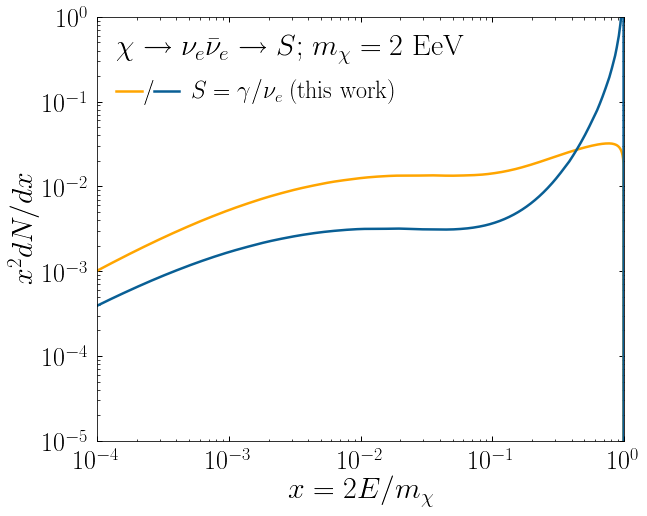

In [2]:
mDM = 2.e9 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue

low_id = 12 # low scale id, here nue
nue = HDMSpectra.spec(low_id, high_id, x, mDM)
low_id = 22 # low scale id, here photon
gam = HDMSpectra.spec(low_id, high_id, x, mDM)

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark (average over chirality)
low_id = 22 # pdg id of low scale state, here a photon

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam, 
         lw=2.5, c='orange')
plt.plot(x, x**2.*nue, 
         lw=2.5, c=(9./256.,95./256.,150./256.))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,1.e0])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.plot([1.4e-4,2.2e-4],[10**(-0.88),10**(-0.88)],lw=2.5,c='orange')
plt.text(2.25e-4,10**(-0.962),r'$/$',fontsize=24)
plt.plot([2.7e-4,10**(np.log10(2.7e-4)+0.19)],[10**(-0.88),10**(-0.88)], lw=2.5,
         c=(9./256.,95./256.,150./256.))
plt.text(1.4e-4,10**(-0.5),r'$\chi \to \nu_e \bar{\nu}_e \to S$; $m_{\chi} = 2$ EeV', fontsize=30)
plt.text(5.2e-4,10**(-1.),r'$S = \gamma / \nu_e$ (this work)', fontsize=24)

plt.tight_layout()
plt.show()

## Figure 3

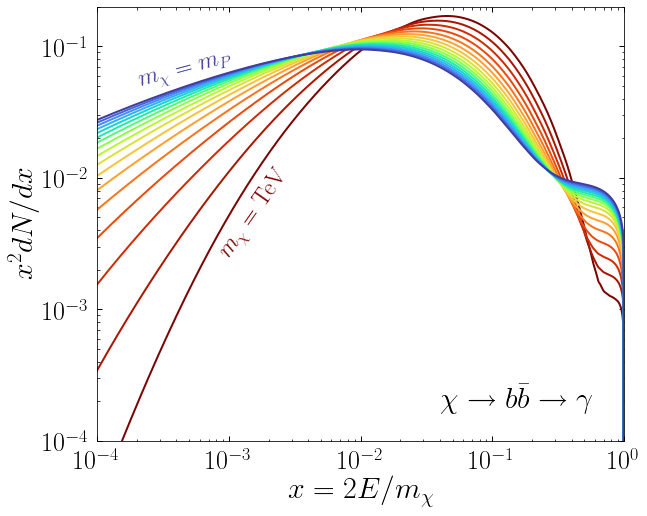

In [3]:
mDM = np.logspace(3.,19,17) # masses [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark
low_id = 22 # pdg id of low scale state, here a photon

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, m in enumerate(mDM):
    dNdx = HDMSpectra.spec(low_id, high_id, x, m)
    plt.plot(x, x**2.*dNdx, 
             lw=2., c=cm((len(mDM)-i)/float(len(mDM))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(4.e-2,10**(-3.75), r'$\chi \to b \bar{b} \to \gamma$', fontsize=30)
plt.text(2.e-4,10**(-1.15), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(mDM))),rotation=15)
plt.text(8.e-4,10**(-2.05), r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=55)

plt.tight_layout()
plt.savefig('./bbbar_allM.png',bbox_inches='tight')
plt.show()

## Figure S1

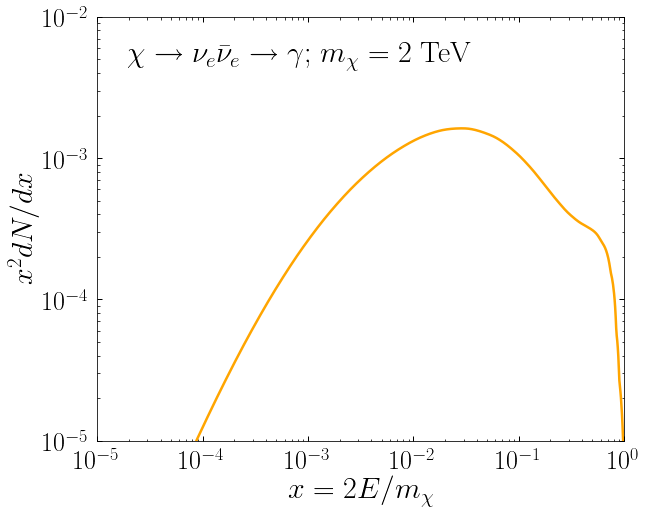

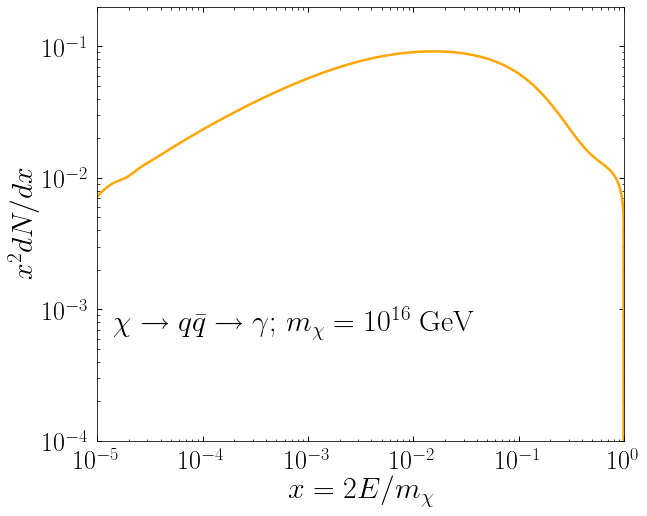

In [4]:
### Left
mDM = 2.e3 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue
low_id = 22 # low scale id, here photon

gam = HDMSpectra.spec(low_id, high_id, x, mDM)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam,
         lw=2.5, c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-5,1.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.text(1.9e-5,10**(-2.35),r'$\chi \to \nu_e \bar{\nu}_e \to \gamma$; $m_{\chi} =2$ TeV', fontsize=30)

plt.tight_layout()
plt.show()


### Right
mDM = 1.e16 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

low_id = 22 # pdg id of low scale state, here a photon

# q = (u+d+s)/3
gam = (HDMSpectra.spec(low_id, 1, x, mDM)
      +HDMSpectra.spec(low_id, 2, x, mDM)
      +HDMSpectra.spec(low_id, 3, x, mDM))/3.

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam,
         lw=2.5, c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.4e-5,10**(-3.2),r'$\chi \to q \bar{q} \to \gamma$; $m_{\chi} = 10^{16}$ GeV', fontsize=30)

plt.tight_layout()
plt.show()

## Figure S6

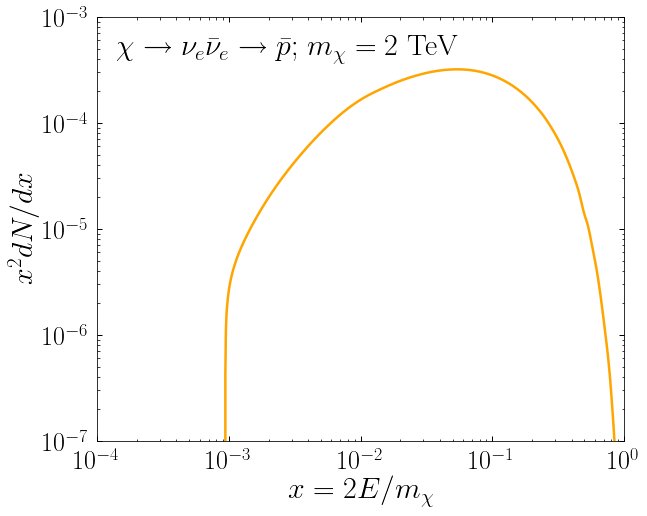

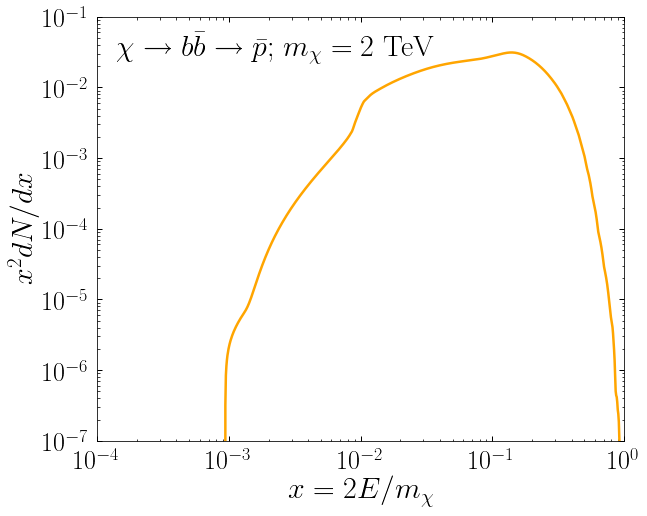

In [5]:
### Left
mDM = 2.e3 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue

low_id = -2212 # low scale id, here anti-proton
ap = HDMSpectra.spec(low_id, high_id, x, mDM)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*ap, 
         lw=2.5, c='orange')

plt.text(1.4e-4,10**(-3.4), r'$\chi \to \nu_e \bar{\nu}_e \to \bar{p}$; $m_{\chi} = 2$ TeV', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-7,1.e-3])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()


### Right
mDM = 2.e3 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark

low_id = -2212 # low scale id, here anti-proton
ap = HDMSpectra.spec(low_id, high_id, x, mDM)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*ap, 
         lw=2.5, c='orange')

plt.text(1.4e-4,10**(-1.6), r'$\chi \to b \bar{b} \to \bar{p}$; $m_{\chi} = 2$ TeV', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-7,1.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()

# Figure S8

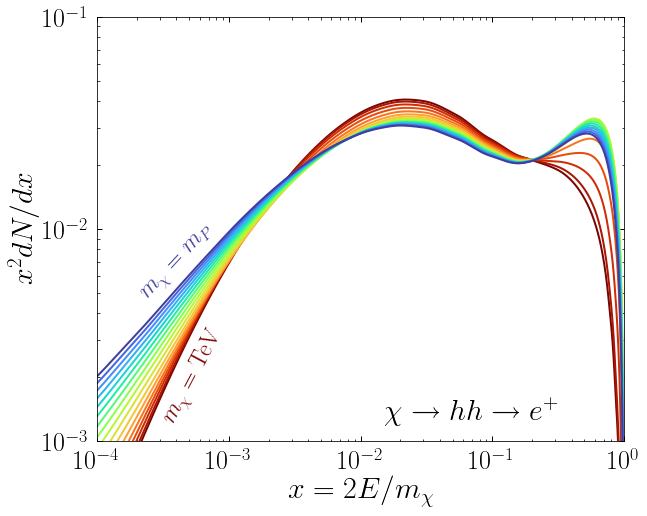

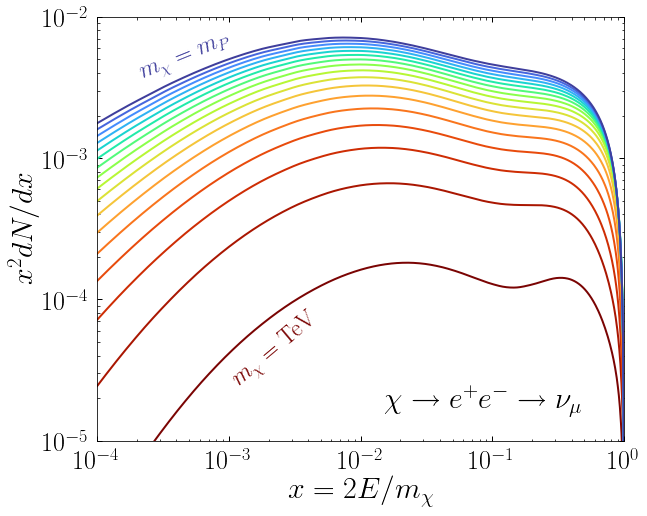

In [6]:
### Top Left
Qvals = np.logspace(3.,19,17)
xvals = np.logspace(-4.,0.,1000)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(11, 25, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,1.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$",fontsize=30)
plt.ylabel(r"$x^2 dN/dx$",fontsize=30)

plt.text(1.5e-2,10**(-2.9),r'$\chi \to h h \to e^+$', fontsize=30)
plt.text(2.e-4,10**(-2.05),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=47)
plt.text(3.e-4,10**(-2.55),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=62)

plt.tight_layout()
plt.show()


### Top Right
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(14, 11, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,1.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.5e-2,10**(-4.8),r'$\chi \to e^+ e^- \to \nu_{\mu}$', fontsize=30)
plt.text(2.e-4,10**(-2.22),r'$m_{\chi} =m_P$', fontsize=24, 
         color=cm(1./float(len(Qvals))), rotation=22)
plt.text(1.e-3,10**(-4.2),r'$m_{\chi} =$ TeV', fontsize=24, 
         color=cm(1.), rotation=40)

plt.tight_layout()
plt.show()

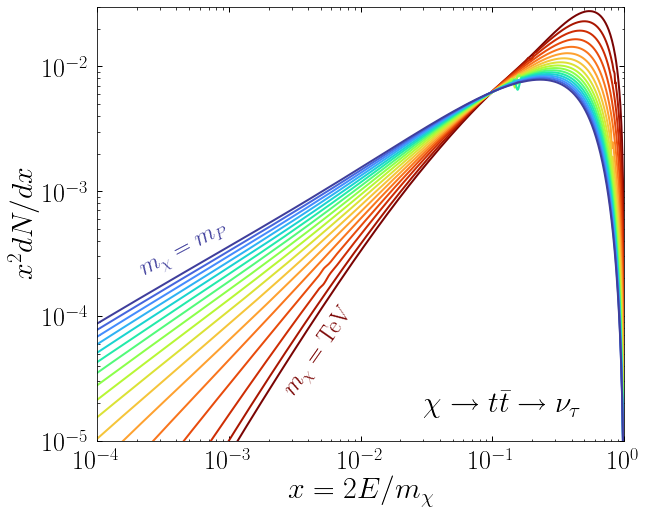

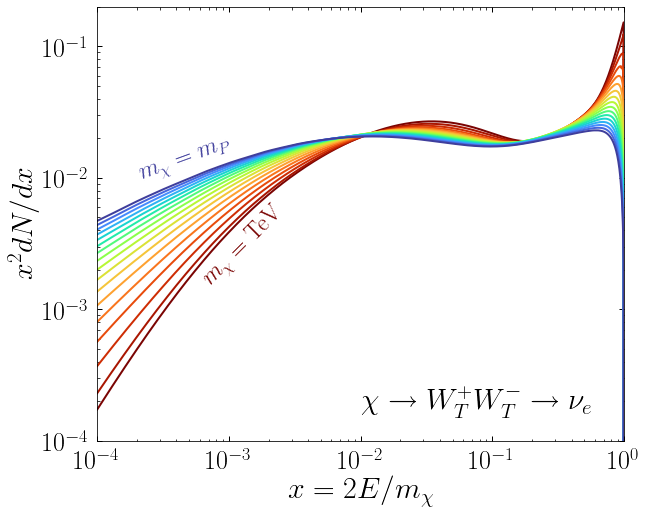

In [7]:
### Bottom Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(16, 6, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,3.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(3.e-2,10**(-4.8), r'$\chi \to t \bar{t} \to \nu_{\tau}$', fontsize=30)
plt.text(2.e-4,10**(-3.37), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=28)
plt.text(2.5e-3,10**(-4.05), r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=55)

plt.tight_layout()
plt.show()


### Bottom Right
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = (HDMSpectra.spec(12, 1924, xvals, iQ)
           +HDMSpectra.spec(12, 2924, xvals, iQ))/2.
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.e-2, 10**(-3.82), r'$\chi \to W_T^+ W_T^- \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-1.8), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=20)
plt.text(6.e-4,10**(-2.33),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=45)

plt.tight_layout()
plt.show()

# Figure S9

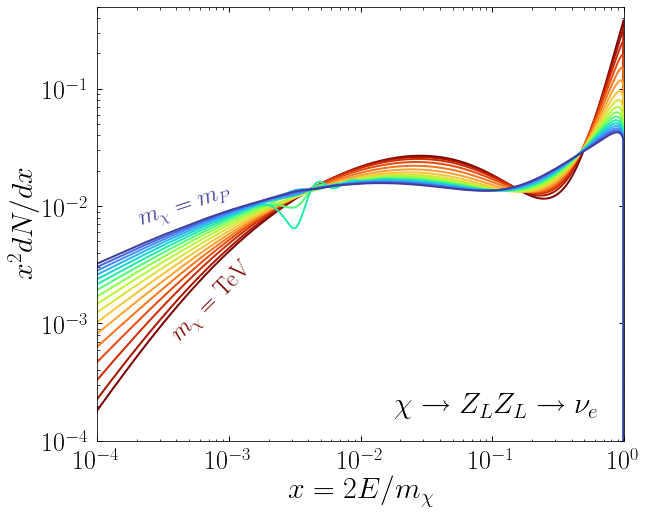

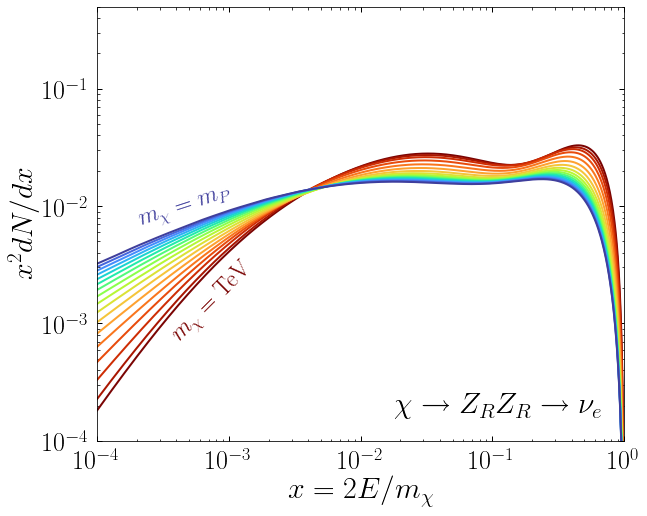

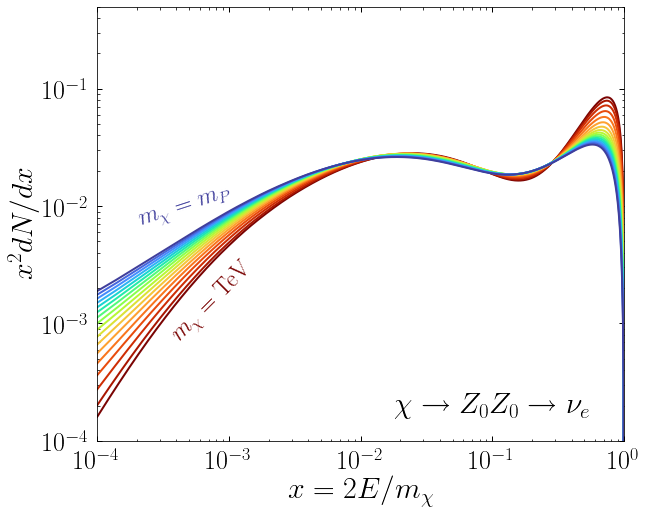

In [8]:
Qvals = np.logspace(3.,19,17)
xvals = np.logspace(-4.,0.,1000)

### Top Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 1923, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_L Z_L \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-1.95),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=18)
plt.text(3.5e-4, 10**(-2.6),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=45)

plt.tight_layout()
plt.show()


### Top Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 2923, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_R Z_R \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-1.95),r'$m_{\chi} =m_P$', fontsize=24, 
         color=cm(1./float(len(Qvals))),rotation=18)
plt.text(3.5e-4, 10**(-2.6),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=45)

plt.tight_layout()
plt.show()


### Bottom
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

cm = plt.get_cmap('turbo')
for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 3923, xvals, iQ)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_0 Z_0 \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-1.95),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))),rotation=18)
plt.text(3.5e-4, 10**(-2.6),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=45)

plt.tight_layout()
plt.show()

# Figure S10

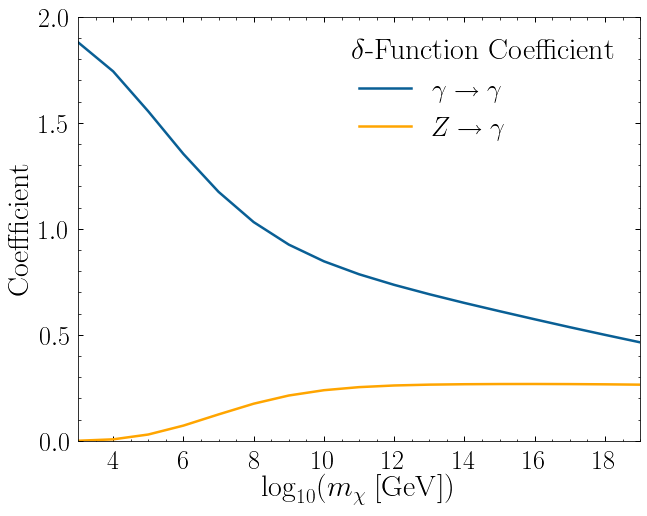

In [9]:
Qvals = np.logspace(3.,19,17)

# Just use a single x value, aim is the delta function
x = np.array([0.5])

delta1 = np.zeros_like(Qvals)
delta2 = np.zeros_like(Qvals)
for i, iQ in enumerate(Qvals):
    # Delta function coefficient stored as the last value
    delta1[i] = HDMSpectra.spec(22, 22, x, iQ, delta=True)[-1]
    delta2[i] = HDMSpectra.spec(22, 23, x, iQ, delta=True)[-1]
    
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(np.log10(Qvals), delta1, 
         lw=2.5,c=(9./256.,95./256.,150./256.), label=r'$\gamma \to \gamma$')
plt.plot(np.log10(Qvals), delta2, 
         lw=2.5,color='orange', label=r'$Z \to \gamma$')

plt.ylim([0.,2])
plt.xlim([3.,19.])
plt.xticks(np.arange(4., 20., 2.))
plt.yticks(np.arange(0., 2.5, 0.5))
plt.xlabel(r"$\log_{10}(m_{\chi}~[{\rm GeV}])$",fontsize=30)
plt.ylabel(r"Coeffficient", fontsize=30)

plt.text(10.8,1.8,r'$\delta$-Function Coefficient', fontsize=30)
plt.legend(bbox_to_anchor=(-0.2, 0.81, 1., .102), loc=1)

plt.tight_layout()
plt.show()